<a href="https://colab.research.google.com/github/rkgupta7463/ML-projects-code/blob/main/diwali_sales_outliers_detection_removal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


How to use this project to in your colab notebook

Follow the steps:-

    1. Download Your Kaggle APIs Key and password file from your kaggle account in setting section
    
    2. Upload APIs key json file in your colab notebook and then run 3 cell of line which start from 1 upto 3 (these cell should only one time)



In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d saadharoon27/diwali-sales-dataset

  0% 0.00/213k [00:00<?, ?B/s]
100% 213k/213k [00:00<00:00, 86.4MB/s]


In [4]:
import zipfile
zip = zipfile.ZipFile("/content/diwali-sales-dataset.zip",'r')
zip.extractall("/content")
zip.close()

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [6]:
df=pd.read_csv('Diwali Sales Data.csv',encoding='latin1')

In [7]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [ ]:
df.shape

(11251, 15)

In [ ]:
orgin_df=df[['Gender','Age Group','Age','Marital_Status','State','Zone','Occupation','Orders','Amount']].iloc[:500]

In [ ]:
orgin_df.head()

,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Orders,Amount
0,F,26-35,28,0,Maharashtra,Western,Healthcare,1,23952.0
1,F,26-35,35,1,Andhra Pradesh,Southern,Govt,3,23934.0
2,F,26-35,35,1,Uttar Pradesh,Central,Automobile,3,23924.0
3,M,0-17,16,0,Karnataka,Southern,Construction,2,23912.0
4,M,26-35,28,1,Gujarat,Western,Food Processing,2,23877.0


In [ ]:
orgin_df.tail()

,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Orders,Amount
495,F,36-45,38,1,Bihar,Eastern,Agriculture,4,19617.0
496,F,46-50,49,0,Bihar,Eastern,Media,2,19617.0
497,F,36-45,43,0,Karnataka,Southern,Aviation,4,19615.0
498,F,26-35,31,0,Haryana,Northern,Aviation,1,19614.0
499,F,36-45,43,0,Uttar Pradesh,Central,Govt,4,19613.0


In [ ]:
orgin_df.shape

(500, 9)

In [ ]:
orgin_df.isnull().sum()

Gender             0
Age Group          0
Age                0
Marital_Status     0
State              0
Zone               0
Occupation         0
Orders             0
Amount            12
dtype: int64

In [ ]:
orgin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          500 non-null    object 
 1   Age Group       500 non-null    object 
 2   Age             500 non-null    int64  
 3   Marital_Status  500 non-null    int64  
 4   State           500 non-null    object 
 5   Zone            500 non-null    object 
 6   Occupation      500 non-null    object 
 7   Orders          500 non-null    int64  
 8   Amount          488 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 35.3+ KB


In [ ]:
amount_mean=orgin_df['Amount'].mean()

In [ ]:
orgin_df['Amount']=orgin_df['Amount'].fillna(value=amount_mean)

In [ ]:
orgin_df['Amount'].isnull().sum()

0

In [ ]:
##1. matplotlib 2. Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# plt.boxplot()

<Axes: >

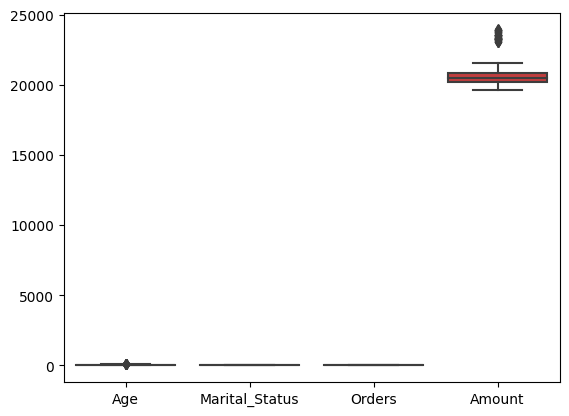

In [ ]:
sns.boxplot(orgin_df)

<Axes: >

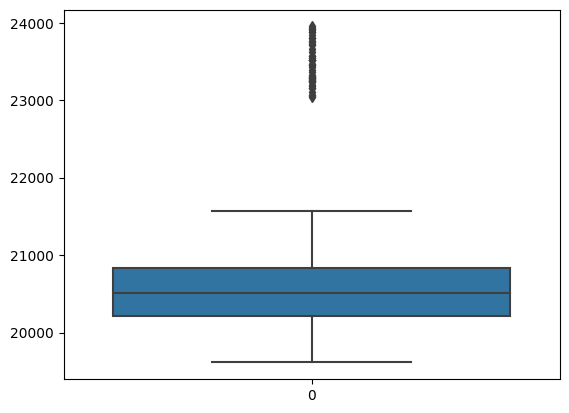

In [ ]:
sns.boxplot(orgin_df['Amount'])

<Axes: ylabel='Amount'>

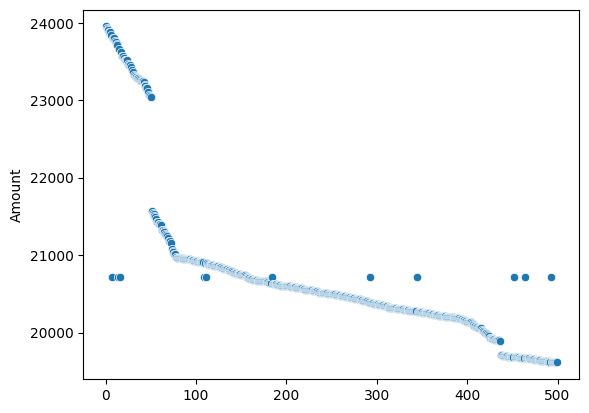

In [ ]:
sns.scatterplot(orgin_df['Amount'])

Text(0, 0.5, 'Amount')

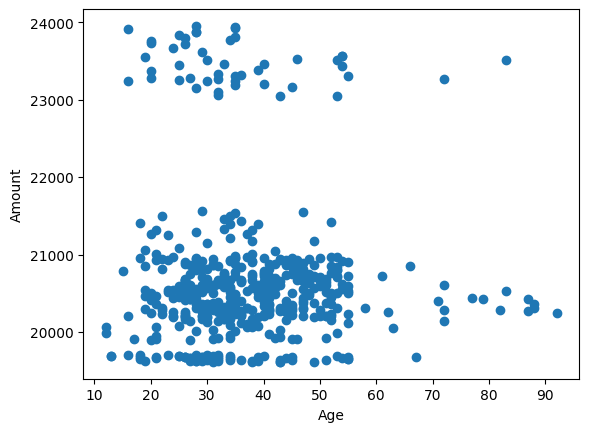

In [ ]:
plt.scatter(y=orgin_df['Amount'],x=orgin_df['Age'])
plt.xlabel("Age")
plt.ylabel("Amount")

## **Outliers Technquies**
1. Capping Tech
2. Triming tech

#### 1. Capping Tech

In [ ]:
Q1=np.percentile(orgin_df['Amount'],25)
Q3=np.percentile(orgin_df['Amount'],75)

In [ ]:
Q1,Q3

(20211.0, 20834.0)

In [ ]:
IQR=Q3-Q1

In [ ]:
IQR,Q1,Q3

(623.0, 20211.0, 20834.0)

In [ ]:
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

In [ ]:
lower_bound,upper_bound

(19276.5, 21768.5)

In [ ]:
outliers_rows=orgin_df[(orgin_df['Amount'] < lower_bound) | (orgin_df['Amount'] > upper_bound)]

In [ ]:
outliers_rows.shape

(48, 9)

In [ ]:
outliers_rows

,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Orders,Amount
0,F,26-35,28,0,Maharashtra,Western,Healthcare,1,23952.00
1,F,26-35,35,1,Andhra Pradesh,Southern,Govt,3,23934.00
2,F,26-35,35,1,Uttar Pradesh,Central,Automobile,3,23924.00
3,M,0-17,16,0,Karnataka,Southern,Construction,2,23912.00
4,M,26-35,28,1,Gujarat,Western,Food Processing,2,23877.00
5,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,1,23877.00
6,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,4,23841.00
8,M,26-35,35,0,Uttar Pradesh,Central,Govt,2,23809.00
9,F,26-35,26,1,Andhra Pradesh,Southern,Media,4,23799.99
10,M,26-35,34,0,Delhi,Central,Banking,1,23770.00


## 1. **Capping Technquie**

In [ ]:
orgin_df['Amount']=np.where(
    orgin_df['Amount']>upper_bound,
    upper_bound,np.where(
    orgin_df['Amount']<lower_bound,
        lower_bound,
        orgin_df['Amount']
    )
)

In [ ]:
outliers_rows=orgin_df[(orgin_df['Amount'] < lower_bound) | (orgin_df['Amount'] > upper_bound)]

In [ ]:
outliers_rows

,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Orders,Amount


In [ ]:
outliers_rows.shape

(0, 9)

<Axes: >

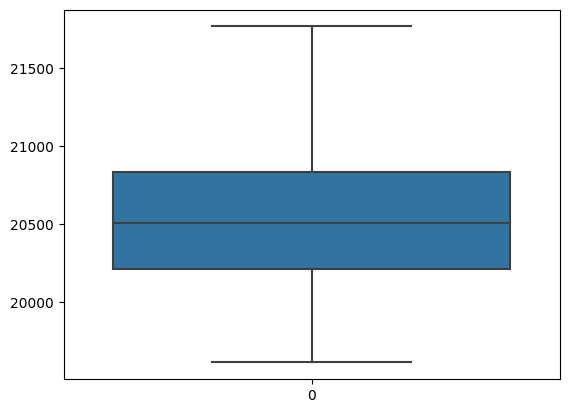

In [ ]:
sns.boxplot(orgin_df['Amount'])

<Axes: ylabel='Amount'>

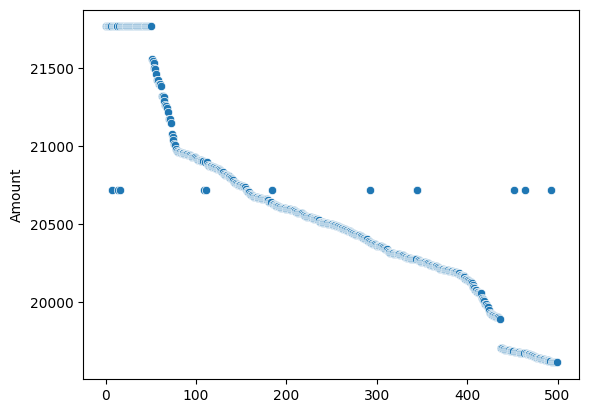

In [ ]:
sns.scatterplot(orgin_df['Amount'])

## 2. **Trimming Technquie**

In [ ]:
orgin_df.head()

,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Orders,Amount
0,F,26-35,28,0,Maharashtra,Western,Healthcare,1,21768.5
1,F,26-35,35,1,Andhra Pradesh,Southern,Govt,3,21768.5
2,F,26-35,35,1,Uttar Pradesh,Central,Automobile,3,21768.5
3,M,0-17,16,0,Karnataka,Southern,Construction,2,21768.5
4,M,26-35,28,1,Gujarat,Western,Food Processing,2,21768.5


<Axes: >

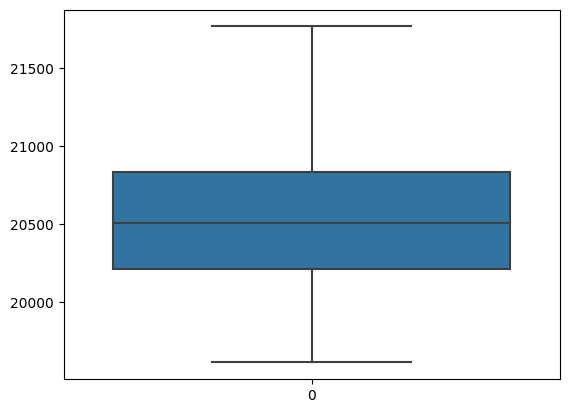

In [ ]:
sns.boxplot(orgin_df['Amount'])

In [ ]:
outliers_df=orgin_df[(orgin_df['Amount'] < lower_bound) | (orgin_df['Amount'] > upper_bound)]

In [ ]:
outliers_df.shape

(0, 9)

In [ ]:
outliers_df

,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Orders,Amount


In [ ]:
filtered_df=orgin_df[(orgin_df['Amount'] > lower_bound) & (orgin_df['Amount'] < upper_bound)]

In [ ]:
filtered_df.shape

(452, 9)

In [ ]:
filtered_df.head()

,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Orders,Amount
7,F,55+,61,0,Maharashtra,Western,IT Sector,1,20717.585922
14,M,46-50,46,1,Madhya Pradesh,Central,Hospitality,3,20717.585922
16,F,46-50,48,1,Andhra Pradesh,Southern,IT Sector,3,20717.585922
51,M,26-35,29,0,Haryana,Northern,IT Sector,2,21563.000000
52,F,46-50,47,0,Delhi,Central,Textile,1,21547.000000


<Axes: ylabel='Amount'>

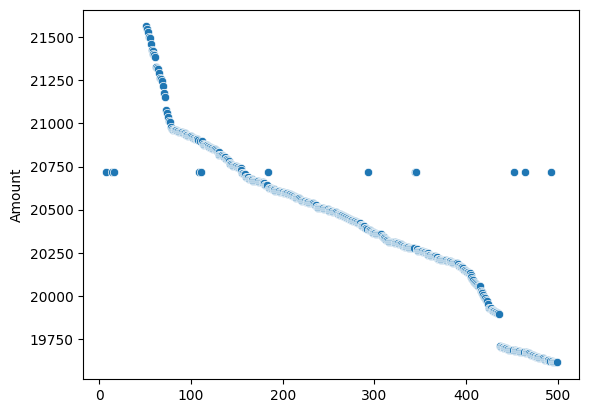

In [ ]:
sns.scatterplot(filtered_df['Amount'])

### **EDA**

In [ ]:
orgin_df['Gender'].value_counts()

Gender
F    344
M    156
Name: count, dtype: int64

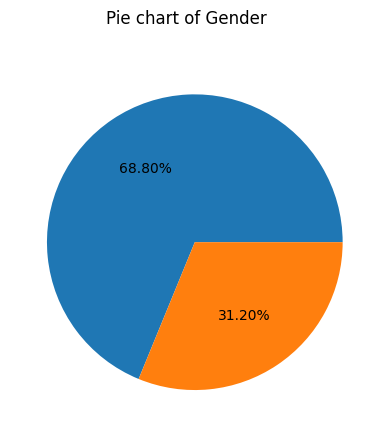

In [ ]:
plt.pie(orgin_df['Gender'].value_counts(),autopct="%1.2f%%")
plt.suptitle("Pie chart of Gender")
plt.show()

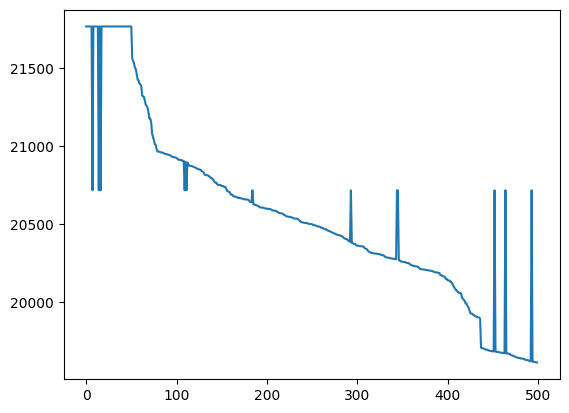

In [ ]:
plt.plot(orgin_df['Amount'])

<Axes: xlabel='Age Group', ylabel='Amount'>

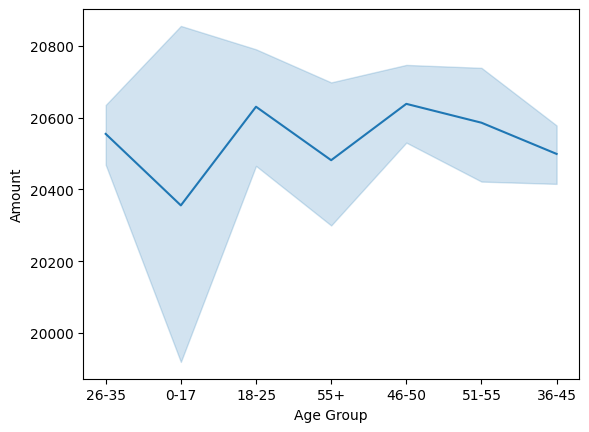

In [ ]:
sns.lineplot(y=orgin_df['Amount'],x=orgin_df['Age Group'])

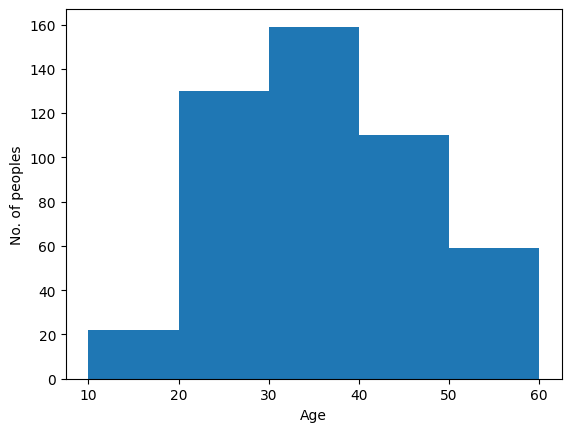

In [ ]:
bins=[10,20,30,40,50,60]
plt.hist(x=orgin_df["Age"],bins=bins)
plt.xlabel("Age")
plt.ylabel("No. of peoples")
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

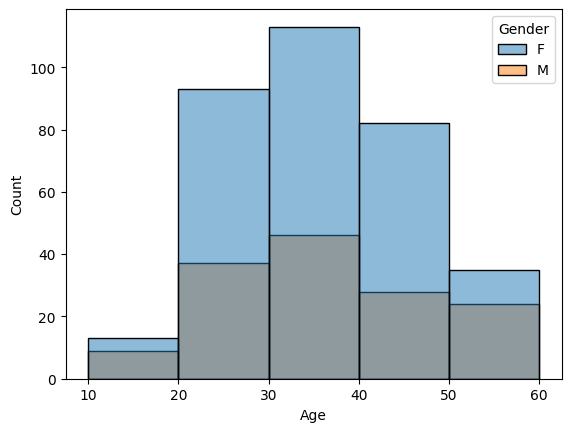

In [ ]:
sns.histplot(x=orgin_df['Age'],bins=bins,hue=orgin_df['Gender'])

In [ ]:
profits=[x  for x in range(100,200,6)]
rev=[x for x in range(50,150,6)]

In [ ]:
len(profits)

17

In [ ]:
len(rev)

17

In [ ]:
p_rev=pd.DataFrame({'Profits':profits,"Rev":rev})

In [ ]:
p_rev.head()

,Profits,Rev
0,100,50
1,106,56
2,112,62
3,118,68
4,124,74


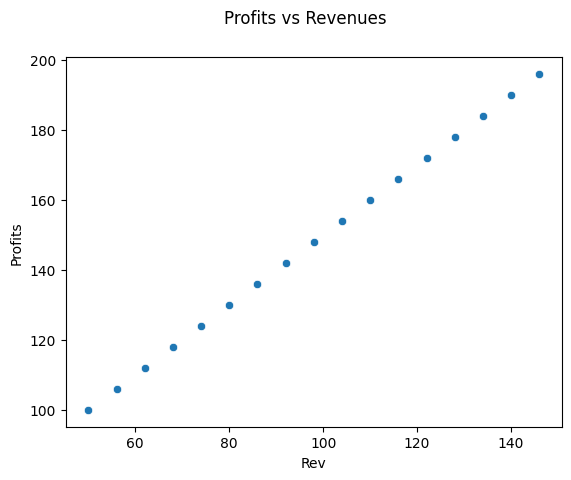

In [ ]:
sns.scatterplot(x=p_rev['Rev'],y=p_rev['Profits'])
plt.suptitle("Profits vs Revenues")
plt.show()